In [ ]:
import math
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import plot
import plotly.graph_objs as go
import plotly as py
import tensorflow as tf
from tensorflow import keras
import statistics
import pylab
np.set_printoptions(precision=4)

In [ ]:
df = pd.read_csv('/content/RF-Spectrum Measurment.csv')
arr1=np.array(df)

In [ ]:
r , c = np.shape(arr1)

In [ ]:
arr2 =  np.zeros([r * (c - 1),2])

In [ ]:
T = np.linspace(0,100 * (c - 1),r * (c - 1))

In [ ]:
arr2[:,0] = T

In [ ]:
for i in range(0,c - 1):
  arr2[i * r:i * r + r,1] = arr1[:,i + 1]

In [ ]:
df = pd.DataFrame(arr2[:,1],columns=['SignalSt'])

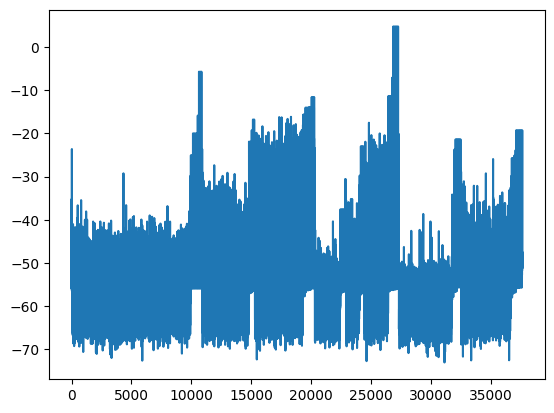

In [ ]:
plt.plot(arr2[:,0],arr2[:,1])

In [ ]:
train_size= int(len(df) * 0.8)
test_size= len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train),len(test))

120620 30156


In [ ]:
def create_dataset(X,y,time_steps=1):
    Xs, ys= [],[]
    for i in range(len(X)-time_steps):
        v= X.iloc[i:(i+time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i+time_steps])
    return np.array(Xs), np.array(ys)
time_steps = 1

In [ ]:
X_train, y_train = create_dataset(train, train.SignalSt, time_steps)

In [ ]:
X_test, y_test = create_dataset(test, test.SignalSt, time_steps)
print(X_train.shape, y_train.shape)

(120619, 1, 1) (120619,)


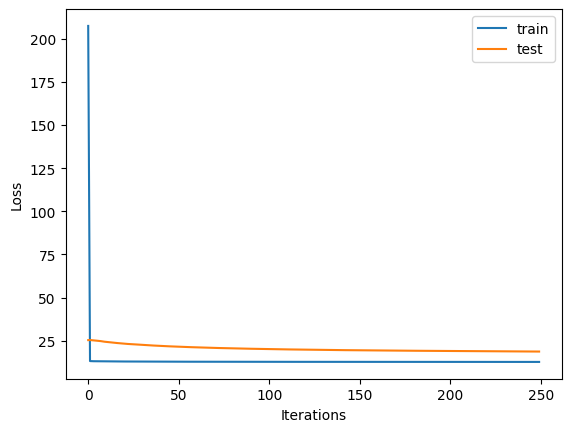

943/943 [==============================] - 2s 2ms/step


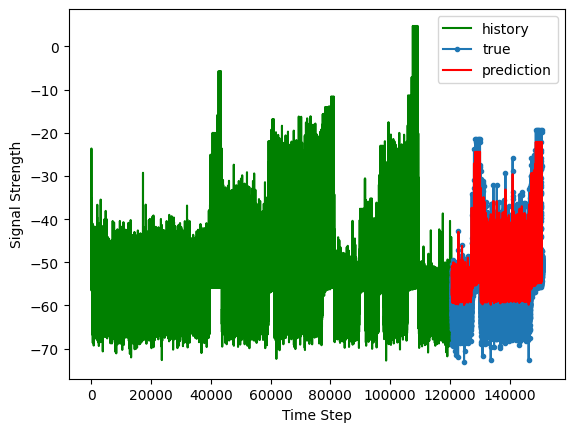

In [ ]:
model=keras.Sequential( )
model.add(keras.layers.LSTM(128,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error',optimizer=keras.optimizers.Adam(0.0005))
history = model.fit(X_train, y_train, epochs=250, batch_size = 16,
                  validation_split = 0.2 , verbose = 0, shuffle = False)
plt.figure(2)
plt.plot(history.history['loss'], label= 'train')
plt.plot(history.history['val_loss'], label= 'test')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(3)

y_pred = model.predict(X_test)

plt.plot(np.arange(0,len(y_train)), y_train, 'g',label="history")
plt.plot(np.arange(len(y_train), len(y_train)+ len(y_test)), y_test, marker='.',label="true")
plt.plot(np.arange(len(y_train), len(y_train)+ len(y_test)), y_pred,  'r', label="prediction")
plt.ylabel('Signal Strength')
plt.xlabel('Time Step')
plt.legend()
plt.show()